# Africa Education

This notebook is an example on how to use the VerticaPy Library. We will use the Africa Education dataset to predict students scores at school. You can download the Jupyter Notebook of the study by clicking <a href="africa_education.ipynb">here</a> and the dataset by clicking <a href="../../data/africa_education.csv">here</a>. To achieve our goals, we have access to many different features.
<ul class="ul_content">
    <li><b>COUNTRY</b> : COUNTRY ID</li>
    <li><b>REGION</b> : REGION ID</li>
    <li><b>SCHOOL</b> : SCHOOL ID</li>
    <li><b>PUPIL</b> : PUPIL ID</li>
    <li><b>province</b> : School Province</li>
    <li><b>schoolname</b> : School Name</li>
    <li><b>lat</b> : School Latitude</li>
    <li><b>long</b> : School Longitude</li>
    <li><b>country_long</b> : Country Name</li>
    <li><b>zralocp</b> : Standardized Reading score's Pupil</li> 
    <li><b>zmalocp</b> : Standardized Mathematics score's pupil</li>
    <li><b>ZRALEVP</b> : Pupil Reading competency level Pupil</li>
    <li><b>ZMALEVP</b> : Pupil Mathematics competency level Pupil</li>
    <li><b>zraloct</b> : Standardized Reading score's Teacher</li> 
    <li><b>zmaloct</b> : Standardized Mathematics score's Teacher</li>
    <li><b>ZRALEVT</b> : Pupil Reading competency level Teacher</li>
    <li><b>ZMALEVT</b> : Pupil Mathematics competency level Teacher</li>
    <li><b>zsdist</b> :	School average distance from clinic, road, public, library, book shop & secondary school</li>
    <li><b>XNUMYRS</b> : Teacher Years of Teaching</li>
    <li><b>numstu</b> : Number of students at each school</li>
    <li><b>PSEX</b> : Pupil's Sex</li>
    <li><b>PNURSERY</b> : Pupil Preschool</li>
    <li><b>PENGLISH</b> : Pupil speaks English At Home</li>
    <li><b>PMALIVE</b> : Pupil Biological Mother Alive</li>
    <li><b>PFALIVE</b> : Pupil Biological Father Alive</li>
    <li><b>PTRAVEL</b> : Travel To School</li>
    <li><b>PTRAVEL2</b> : Means Of Travel To School</li>
    <li><b>PMOTHER</b> : Mother's Education</li>
    <li><b>PFATHER</b> : Father's Education</li>
    <li><b>PLIGHT</b> : Source Of Lighting</li>
    <li><b>PABSENT</b> : Days Absent</li>
    <li><b>PREPEAT</b> : Repeated Grades</li>
    <li><b>STYPE</b> : School Type</li>
    <li><b>SLOCAT</b> :	School Location</li>
    <li><b>SQACADEM</b> : Qualification-Academic</li>
    <li><b>XSEX</b> : Teacher's sex</li>
    <li><b>XAGE</b> : Teacher's Age</li>
    <li><b>XQPERMNT</b> : Teacher Employment Status</li>
    <li><b>XQPROFES</b> : Teacher Training</li>
    <li><b>zpsibs</b> : Pupil number of brothers and sisters</li>
    <li><b>zpsit</b> : Sitting place</li>
    <li><b>zpmealsc</b> : Free school meals</li>
    <li><b>zphmwkhl</b> : Homework help</li>
    <li><b>zpses</b> : Pupil socioeconomic status</li>
    <li><b>PAGE</b> : Pupil's Age</li>
    <li><b>SINS2006</b> : INSPECTION School</li>
    <li><b>SPUPPR04</b> : Pupil Dropout</li>
    <li><b>SPUPPR06</b> : Pupil Cheating</li>
    <li><b>SPUPPR07</b> : Pupil Use Abusive Language</li>
    <li><b>SPUPPR08</b> : Pupil Vandalism</li>
    <li><b>SPUPPR09</b> : Pupil Theft</li>
    <li><b>SPUPPR10</b> : Pupil Bullying Pupils</li>
    <li><b>SPUPPR11</b> : Pupil Bullying Staff</li>
    <li><b>SPUPPR12</b> : Pupil Injure Staff</li>
    <li><b>SPUPPR13</b> : Pupil Sexually Harrass Pupils</li>
    <li><b>SPUPPR14</b> : Pupil Sexually Harrass Teachers</li>
    <li><b>SPUPPR15</b> : Pupil Drug Abuse</li>
    <li><b>SPUPPR16</b> : Pupil Alcohol Abuse</li>
    <li><b>SPUPPR17</b> : Pupil Fights</li>
    <li><b>STCHPR04</b> : Teacher Bully Pupils</li>
    <li><b>STCHPR05</b> : Teacher Harass Sexually Teachers</li>
    <li><b>STCHPR06</b> : Teacher Harass Sexually Pupils</li>
    <li><b>STCHPR07</b> : Teacher Language</li>
    <li><b>STCHPR08</b> : Teacher Drug Abuse</li>
    <li><b>STCHPR09</b> : Teacher Alcohol Abuse</li>
</ul>

We will follow the entire Data Science cycle (Data Exploration - Data Preparation - Data Modeling - Model Evaluation - Model Deployment) and solve this easy use-case. The purpose is to show you some of the library interesting functionalities.

## Initialization

Let's create the Virtual DataFrames of the dataset.

In [1]:
from verticapy import *
africa = vDataFrame("africa_education")
print(africa.head(2))

,PABSENT,STCHPR05,ZRALEVT,SPUPPR11,zpmealsc,PREPEAT,zmaloct,SPUPPR04,zraloct,COUNTRY,zralocp,district,SCHOOL,XSEX,XQPROFES,PTRAVEL2,SPUPPR17,PENGLISH,SPUPPR06,SPUPPR16,zpsit,STCHPR06,zpses,country_long,SPUPPR15,PMOTHER,STYPE,SPUPPR08,SPUPPR14,PMALIVE,zmalocp,STCHPR09,PTRAVEL,ZMALEVP,lat,PLIGHT,lon,PUPIL,ZRALEVP,PFATHER,zphmwkhl,XQPERMNT,SPUPPR09,SPUPPR13,STCHPR08,SPUPPR12,PNURSERY,SINS2006,PSEX,ZMALEVT,XNUMYRS,SLOCAT,zsdist,province,numstu,REGION,XAGE,STCHPR04,SPUPPR07,SPUPPR10,zpsibs,PAGE,STCHPR07,SQACADEM,PFALIVE,schoolname
0,0,NEVER,None,SOMETIMES,No,NEVER,469.293690770499,SOMETIMES,None,SOU,726.682103722197,KZ,500214970,FEMALE,3 YRS TT,CAR,OFTEN,ALL THE TIME,SOMETIMES,NEVER,I have my own sitting place,NEVER,15.000,South Africa,NEVER,Completed Some University,GOVERNMENT,SOMETIMES,NEVER,True,635.594913126452,NEVER,>0.5-1KM,5.000,-29.906887,ELECTRIC,30.8674640,24,8,Completed Some University,Most of time/Always corrects,PERMANENT GOVT,SOMETIMES,SOMETIMES,NEVER,NEVER,THREE OR MORE YEARS,0.000,GIRL,3.000,26.000,LARGE CITY,3.00,UMLAZI,24,KZN,48.000,SOMETIMES,SOMETIMES,OFTEN,1,12,SOMETIMES,A-LEVEL,NO,MOORTON HEIGHTS PRIMARY SCHOOL
1,0,NEVER,6.000,SOMETIMES,No,NEVER,492.584863319675,SOMETIMES,581.994282503848,NAM,428.150211557773,Windhoek Rural,8800,FEMALE,>3 YRS TT,WALK,SOMETIMES,SOMETIMES,SOMETIMES,NEVER,I have my own sitting place,NEVER,5.000,Namibia,NEVER,I Do Not Know,GOVERNMENT,SOMETIMES,NEVER,True,423.836523089981,NEVER,>4.5-5KM,2.000,-18.069998,PARAFFIN/OIL,16.2523290,8,3,I Do Not Know,No homework/Never/Sometimes,PERMANENT GOVT,SOMETIMES,NEVER,NEVER,NEVER,THREE OR MORE YEARS,2.000,BOY,3.000,10.000,LARGE CITY,1.60,Khomas,23,KHO,34.000,SOMETIMES,SOMETIMES,SOMETIMES,8,14,SOMETIMES,TERTIARY ED,YES,Namibia Primary School
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: africa_education, Number of rows: 60890, Number of columns: 66


## Data Exploration and Preparation

Let's look at the links between all the variables. We have to keep in mind that we need to find a way to predict the final students scores (zralocp & zmalocp).

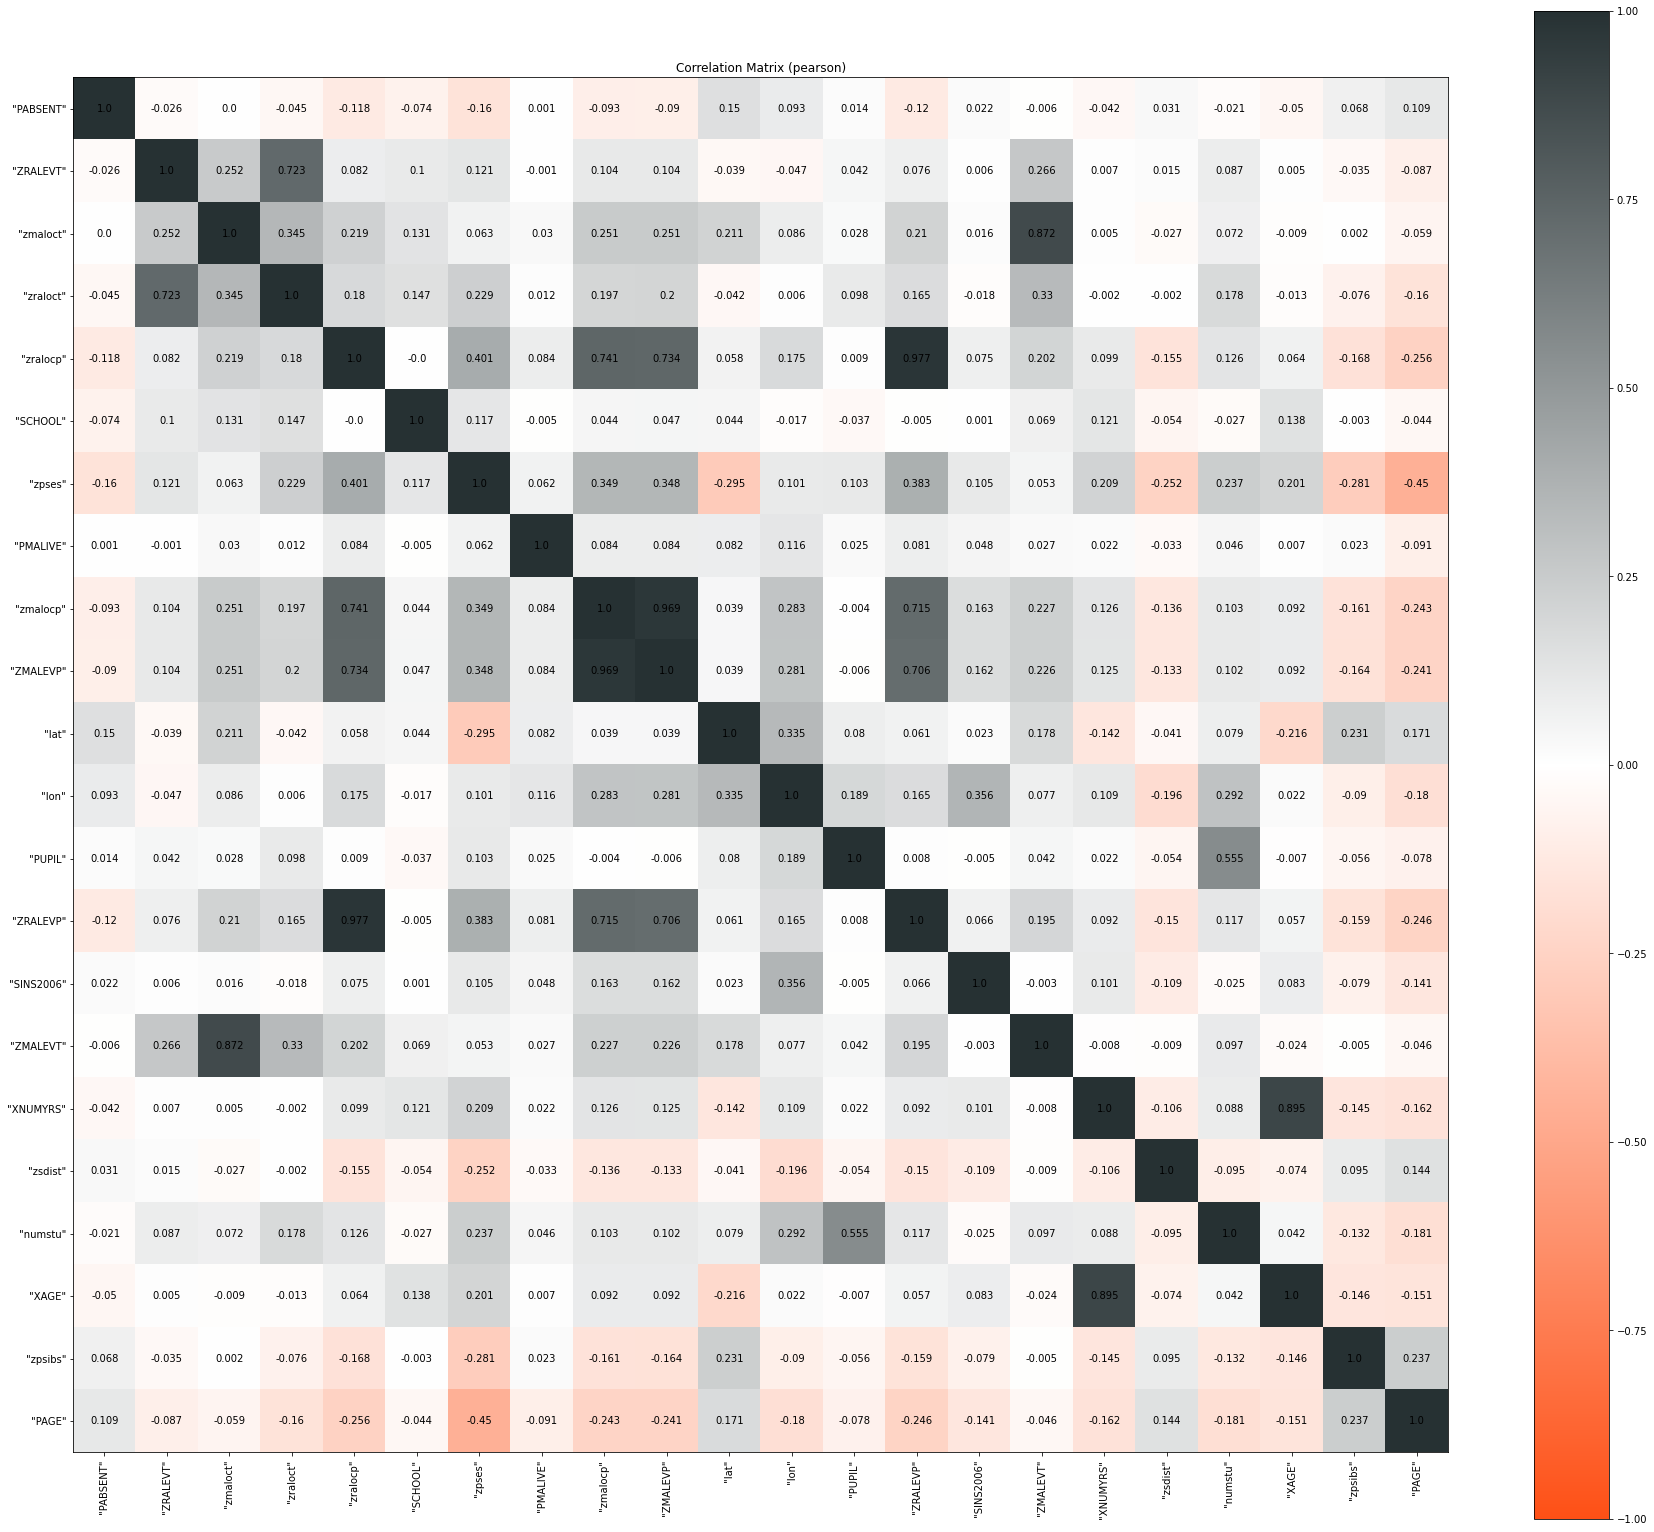

In [2]:
%matplotlib inline
x = africa.corr()

Some variables are useless because they are categorizations of others. For example, most of the scores can go from 0 to 1000. Some variables are created by mapping these variables to a reduced interval (for example 0 to 10). We can drop them.

In [3]:
africa.drop(["ZMALEVT", 
             "ZRALEVT", 
             "ZRALEVP", 
             "ZMALEVP",
             "COUNTRY",
             "SCHOOL",
             "PUPIL"]).head(2)

,PABSENT,STCHPR05,SPUPPR11,zpmealsc,PREPEAT,zmaloct,SPUPPR04,zraloct,zralocp,district,XSEX,XQPROFES,PTRAVEL2,SPUPPR17,PENGLISH,SPUPPR06,SPUPPR16,zpsit,STCHPR06,zpses,country_long,SPUPPR15,PMOTHER,STYPE,SPUPPR08,SPUPPR14,PMALIVE,zmalocp,STCHPR09,PTRAVEL,lat,PLIGHT,lon,PFATHER,zphmwkhl,XQPERMNT,SPUPPR09,SPUPPR13,STCHPR08,SPUPPR12,PNURSERY,SINS2006,PSEX,XNUMYRS,SLOCAT,zsdist,province,numstu,REGION,XAGE,STCHPR04,SPUPPR07,SPUPPR10,zpsibs,PAGE,STCHPR07,SQACADEM,PFALIVE,schoolname
0,0,NEVER,SOMETIMES,No,NEVER,469.293690770499,SOMETIMES,None,726.682103722197,KZ,FEMALE,3 YRS TT,CAR,OFTEN,ALL THE TIME,SOMETIMES,NEVER,I have my own sitting place,NEVER,15.000,South Africa,NEVER,Completed Some University,GOVERNMENT,SOMETIMES,NEVER,True,635.594913126452,NEVER,>0.5-1KM,-29.906887,ELECTRIC,30.8674640,Completed Some University,Most of time/Always corrects,PERMANENT GOVT,SOMETIMES,SOMETIMES,NEVER,NEVER,THREE OR MORE YEARS,0.000,GIRL,26.000,LARGE CITY,3.00,UMLAZI,24,KZN,48.000,SOMETIMES,SOMETIMES,OFTEN,1,12,SOMETIMES,A-LEVEL,NO,MOORTON HEIGHTS PRIMARY SCHOOL
1,0,NEVER,SOMETIMES,No,NEVER,492.584863319675,SOMETIMES,581.994282503848,428.150211557773,Windhoek Rural,FEMALE,>3 YRS TT,WALK,SOMETIMES,SOMETIMES,SOMETIMES,NEVER,I have my own sitting place,NEVER,5.000,Namibia,NEVER,I Do Not Know,GOVERNMENT,SOMETIMES,NEVER,True,423.836523089981,NEVER,>4.5-5KM,-18.069998,PARAFFIN/OIL,16.2523290,I Do Not Know,No homework/Never/Sometimes,PERMANENT GOVT,SOMETIMES,NEVER,NEVER,NEVER,THREE OR MORE YEARS,2.000,BOY,10.000,LARGE CITY,1.60,Khomas,23,KHO,34.000,SOMETIMES,SOMETIMES,SOMETIMES,8,14,SOMETIMES,TERTIARY ED,YES,Namibia Primary School
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: africa_education, Number of rows: 60890, Number of columns: 59

Let's now look at the missing values.

In [4]:
africa.count()

,count,percent
"""PABSENT""",60890.0,100.0
"""zpmealsc""",60890.0,100.0
"""PREPEAT""",60890.0,100.0
"""zralocp""",60890.0,100.0
"""district""",60890.0,100.0
"""PTRAVEL2""",60890.0,100.0
"""PENGLISH""",60890.0,100.0
"""zpsit""",60890.0,100.0
"""country_long""",60890.0,100.0
"""PMOTHER""",60890.0,100.0


<object>

Many values are missing for 'zraloct' and 'zmaloct' which are the teachers test scores. We need to find a way to impute them as they represent more than 10% of the dataset. For the others, as they represent less than 5% of the dataset and the purpose of the study is to identify what makes the students good, we can filter them.

3 important Variables can be used to impute the teacher score (TEACHER'S SEX - XSEX, Teacher Employment Status - XQPERMNT and Teacher Training - XQPROFES).

In [5]:
africa["zraloct"].fillna(method = "avg", 
                         by = ["XSEX", "XQPERMNT", "XQPROFES"])
africa["zmaloct"].fillna(method = "avg", 
                         by = ["XSEX", "XQPERMNT", "XQPROFES"])
africa.dropna()

6254 element(s) was/were filled
6887 element(s) was/were filled
3722 element(s) was/were dropped


,PABSENT,STCHPR05,SPUPPR11,zpmealsc,PREPEAT,zmaloct,SPUPPR04,zraloct,zralocp,district,XSEX,XQPROFES,PTRAVEL2,SPUPPR17,PENGLISH,SPUPPR06,SPUPPR16,zpsit,STCHPR06,zpses,country_long,SPUPPR15,PMOTHER,STYPE,SPUPPR08,SPUPPR14,PMALIVE,zmalocp,STCHPR09,PTRAVEL,lat,PLIGHT,lon,PFATHER,zphmwkhl,XQPERMNT,SPUPPR09,SPUPPR13,STCHPR08,SPUPPR12,PNURSERY,SINS2006,PSEX,XNUMYRS,SLOCAT,zsdist,province,numstu,REGION,XAGE,STCHPR04,SPUPPR07,SPUPPR10,zpsibs,PAGE,STCHPR07,SQACADEM,PFALIVE,schoolname
0,23,NEVER,SOMETIMES,No,NEVER,848.478480580758,NEVER,930.88554817077,709.037247476057,GT,FEMALE,1 YR TT,CAR,SOMETIMES,ALL THE TIME,SOMETIMES,SOMETIMES,I have my own sitting place,NEVER,11.000,South Africa,NEVER,Completed All Secondary,GOVERNMENT,SOMETIMES,NEVER,True,610.278421225174,NEVER,>5KM,-26.145651,ELECTRIC,27.8735050,Completed All Secondary,No homework/Never/Sometimes,TEMPORARY GOVT,SOMETIMES,SOMETIMES,NEVER,NEVER,TWO YEARS,0.000,BOY,1.000,LARGE CITY,2.40,JOHANNESBURG WEST,24,GTN,26.000,SOMETIMES,SOMETIMES,SOMETIMES,1,13,SOMETIMES,A-LEVEL,NO,HORIZON VIEW PRIMARY SCHOOL
1,9,NEVER,NEVER,One per day,TWICE,832.61347898929,SOMETIMES,906.564259831496,618.237771009434,Manzini,FEMALE,1 YR TT,WALK,SOMETIMES,NEVER,NEVER,NEVER,I have my own sitting place,NEVER,14.000,Swaziland,NEVER,Completed Training After Secondary,PRIVATE,NEVER,NEVER,True,522.289547150508,NEVER,>0.5-1KM,-26.682388,ELECTRIC,31.0589080,Completed University Degree,Most of time/Always corrects,TEMPORARY GOVT,NEVER,NEVER,NEVER,NEVER,ONE YEAR,0.000,GIRL,1.000,RURAL,18.20,Manzini,25,MAN,25.000,NEVER,SOMETIMES,SOMETIMES,0,12,NEVER,A-LEVEL,YES,Emhlangeni Primary
2,9,NEVER,NEVER,One per day,TWICE,832.61347898929,SOMETIMES,906.564259831496,629.015439959779,Manzini,FEMALE,1 YR TT,WALK,SOMETIMES,NEVER,NEVER,NEVER,I have my own sitting place,NEVER,3.000,Swaziland,NEVER,"No School, No Adult Education",PRIVATE,NEVER,NEVER,True,597.676434145426,NEVER,>0.5-1KM,-26.682388,PARAFFIN/OIL,31.0589080,I Do Not Have a Father,No homework/Never/Sometimes,TEMPORARY GOVT,NEVER,NEVER,NEVER,NEVER,ONE YEAR,0.000,BOY,1.000,RURAL,18.20,Manzini,25,MAN,25.000,NEVER,SOMETIMES,SOMETIMES,11,14,NEVER,A-LEVEL,NO,Emhlangeni Primary
3,9,NEVER,NEVER,One per day,ONCE,832.61347898929,SOMETIMES,906.564259831496,597.731586723379,Manzini,FEMALE,1 YR TT,WALK,SOMETIMES,SOMETIMES,NEVER,NEVER,I have my own sitting place,NEVER,5.000,Swaziland,NEVER,Completed All Primary,PRIVATE,NEVER,NEVER,False,585.299482549246,NEVER,>1.5-2KM,-26.682388,CANDLE,31.0589080,I Do Not Know,No homework/Never/Sometimes,TEMPORARY GOVT,NEVER,NEVER,NEVER,NEVER,ONE YEAR,0.000,BOY,1.000,RURAL,18.20,Manzini,25,MAN,25.000,NEVER,SOMETIMES,SOMETIMES,0,15,NEVER,A-LEVEL,DON'T KNOW,Emhlangeni Primary
4,8,SOMETIMES,SOMETIMES,No,NEVER,923.752849833893,SOMETIMES,649.235491441842,583.329568922475,SINGIDA,FEMALE,1 YR TT,WALK,SOMETIMES,SOMETIMES,SOMETIMES,SOMETIMES,I have my own sitting place,SOMETIMES,3.000,Tanzania,SOMETIMES,"No School, No Adult Education",GOVERNMENT,SOMETIMES,SOMETIMES,True,513.288127807832,SOMETIMES,UP TO 0.5KM,-4.8227744,PARAFFIN/OIL,34.7561840,Completed All Primary,No homework/Never/Sometimes,TEMPORARY GOVT,SOMETIMES,SOMETIMES,SOMETIMES,SOMETIMES,ONE YEAR,0.000,BOY,1.000,RURAL,21.00,CENTRAL,23,CEN,22.000,SOMETIMES,SOMETIMES,SOMETIMES,5,14,SOMETIMES,JUNIOR SEC,YES,MINYUGHE
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: africa_education, Number of rows: 57168, Number of columns: 59

Now, our Dataset is clean. We can use a Random Forest Regressor to understand which features will really influence the final student score. Let's export the result to the Vertica DB. We will also add a variable random to be able to easily split the dataset into train and test.

In [6]:
africa.eval(name = "split",
            expr = "RANDOM()")
drop_table("africa_education_clean")
africa.to_db("africa_education_clean",
             relation_type = "table",
             inplace = True)

The table africa_education_clean was successfully dropped.


,zraloct,zralocp,district,REGION,XSEX,XQPROFES,PTRAVEL2,PTRAVEL,PABSENT,STCHPR05,SPUPPR13,zpmealsc,PREPEAT,zmaloct,SPUPPR08,SPUPPR16,lat,PLIGHT,lon,PFATHER,PSEX,XNUMYRS,SLOCAT,zsdist,SPUPPR04,SPUPPR12,zpsit,STCHPR09,zpses,country_long,SPUPPR10,PMOTHER,province,numstu,PFALIVE,STYPE,split,SPUPPR09,SPUPPR15,PMALIVE,zmalocp,STCHPR04,zphmwkhl,XQPERMNT,SPUPPR06,SPUPPR11,SQACADEM,STCHPR06,PNURSERY,SINS2006,XAGE,SPUPPR07,SPUPPR14,PENGLISH,SPUPPR17,STCHPR07,zpsibs,STCHPR08,PAGE,schoolname
0,777.327610028686,626.726377527847,KAGERA,KAG,FEMALE,1 YR TT,WALK,>2.5-3KM,25,NEVER,NEVER,No,ONCE,803.02131290024,SOMETIMES,NEVER,-1.6762649,PARAFFIN/OIL,31.5686000,Completed All Primary,BOY,4.000,RURAL,15.00,SOMETIMES,NEVER,I have my own sitting place,NEVER,4.000,Tanzania,SOMETIMES,I Do Not Have a Mother,KAGERA,25,YES,GOVERNMENT,0.89893188001588,SOMETIMES,NEVER,False,578.323382558671,NEVER,No homework/Never/Sometimes,PERMANENT GOVT,NEVER,NEVER,JUNIOR SEC,NEVER,ONE YEAR,1.000,26.000,SOMETIMES,NEVER,MOST OF THE TIME,SOMETIMES,NEVER,4,NEVER,16,RULANDA
1,777.327610028686,443.792138175973,ARUSHA,NOR,FEMALE,1 YR TT,WALK,>2.5-3KM,24,NEVER,NEVER,No,NEVER,865.243624106494,NEVER,NEVER,-5.0214324,FIRE,38.3681490,Completed All Primary,GIRL,4.000,RURAL,28.40,OFTEN,NEVER,I have my own sitting place,NEVER,3.000,Tanzania,SOMETIMES,"No School, No Adult Education",NORTHERN,24,YES,GOVERNMENT,0.256625683512539,SOMETIMES,NEVER,True,486.058834296235,NEVER,No homework/Never/Sometimes,PERMANENT GOVT,SOMETIMES,NEVER,JUNIOR SEC,NEVER,ONE YEAR,0.000,23.000,NEVER,NEVER,SOMETIMES,SOMETIMES,SOMETIMES,5,NEVER,15,BARAKA
2,742.006790052328,464.393700063358,Vacoas & West,4VA,FEMALE,1 YR TT,BUS/TRUCK/VAN,>1-1.5KM,22,NEVER,NEVER,One per day,ONCE,803.229740193183,SOMETIMES,NEVER,-20.298403,ELECTRIC,57.4938350,Completed All Primary,BOY,32.000,LARGE CITY,1.00,NEVER,NEVER,I have my own sitting place,NEVER,11.000,Mauritius,SOMETIMES,Some Training After Primary,4VA&W(G),23,YES,GOVERNMENT,0.153818720486015,SOMETIMES,NEVER,True,509.350006845411,NEVER,No homework/Never/Sometimes,PERMANENT GOVT,SOMETIMES,SOMETIMES,A-LEVEL,NEVER,THREE OR MORE YEARS,0.000,58.000,SOMETIMES,NEVER,SOMETIMES,SOMETIMES,NEVER,2,NEVER,12,E. ROCHECOUSTE GS
3,777.327610028686,535.35463545324,ARUSHA,NOR,FEMALE,1 YR TT,WALK,>0.5-1KM,18,NEVER,NEVER,No,NEVER,865.243624106494,NEVER,NEVER,-5.0214324,FIRE,38.3681490,Some Training After Primary,BOY,4.000,RURAL,28.40,OFTEN,NEVER,I have my own sitting place,NEVER,4.000,Tanzania,SOMETIMES,Completed All Secondary,NORTHERN,24,YES,GOVERNMENT,0.242316509597003,SOMETIMES,NEVER,True,513.288127807832,NEVER,No homework/Never/Sometimes,PERMANENT GOVT,SOMETIMES,NEVER,JUNIOR SEC,NEVER,NEVER,0.000,23.000,NEVER,NEVER,SOMETIMES,SOMETIMES,SOMETIMES,7,NEVER,15,BARAKA
4,742.006790052328,408.883936089015,Port Louis & North,1PL,FEMALE,1 YR TT,WALK,>1-1.5KM,17,NEVER,NEVER,One per day,NEVER,803.229740193183,NEVER,NEVER,-20.16304,ELECTRIC,57.5035710,I Do Not Have a Father,BOY,28.000,LARGE CITY,1.00,NEVER,NEVER,I have my own sitting place,NEVER,9.000,Mauritius,SOMETIMES,Completed All Primary,1PL&N(G),19,NO,GOVERNMENT,0.0179573260247707,NEVER,NEVER,True,423.836523089981,NEVER,No homework/Never/Sometimes,PERMANENT GOVT,OFTEN,SOMETIMES,A-LEVEL,NEVER,TWO YEARS,0.000,49.000,SOMETIMES,NEVER,NEVER,OFTEN,SOMETIMES,1,NEVER,11,SURTEE SOONNEE GS
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: africa_education_clean, Number of rows: 57168, Number of columns: 60

## Machine Learning: Finding Clusters using lat/long

A natural idea when we have data on the school location is to find school clusters based on proximity rather than countries borders. These clusters can be used as inputs by our model.

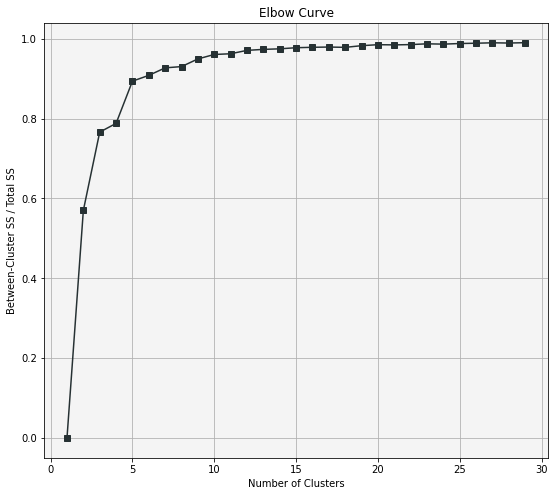

In [7]:
from verticapy.learn.plot import elbow
x = elbow(X = ["lon", "lat"],
          input_relation = "africa_education_clean",
          n_cluster = (1, 30))

8 seems to be a suitable number of clusters. Let's compute a KMeans model.

In [8]:
from verticapy.learn.cluster import KMeans
model = KMeans(name = "kmeans_africa",
               n_cluster = 8)
model.drop()
model.fit(input_relation = "africa_education_clean", 
          X = ["lon", "lat"])



centers
  lon   |   lat   
--------+---------
28.91835|-26.69502
38.05947|-6.56818 
17.71399|-19.32945
32.42317|-15.80647
57.92005|-20.21202
55.50770|-4.61953 
20.07383|-30.82077
34.05317| 0.05563 


metrics
Evaluation metrics:
     Total Sum of Squares: 11827406
     Within-Cluster Sum of Squares: 
         Cluster 0: 254610.5
         Cluster 1: 66454.634
         Cluster 2: 86290.286
         Cluster 3: 141233.98
         Cluster 4: 7982.8683
         Cluster 5: 39.858968
         Cluster 6: 30762.037
         Cluster 7: 84316.275
     Total Within-Cluster Sum of Squares: 671690.44
     Between-Cluster Sum of Squares: 11155716
     Between-Cluster SS / Total SS: 94.32%
 Number of iterations performed: 13
 Converged: True
 Call:
kmeans('public.kmeans_africa', 'africa_education_clean', '"lon", "lat"', 8
USING PARAMETERS max_iterations=300, epsilon=0.0001, init_method='kmeanspp', distance_method='euclidean')

We can add the prediction in the vDataFrame and draw the scatter map.

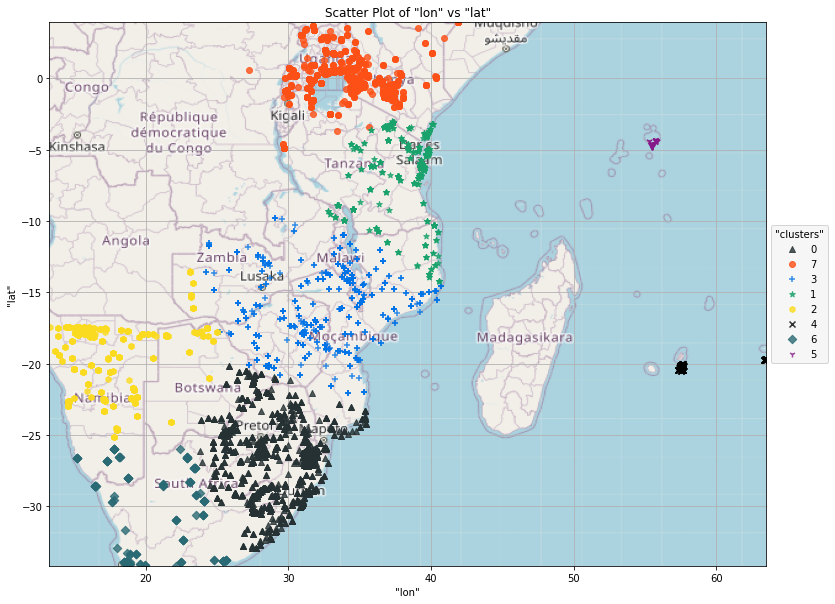

In [9]:
model.predict(africa,
              name = "clusters")
x = africa.scatter(["lon", "lat"],
                   catcol = "clusters",
                   max_cardinality = 100,
                   img = "img/africa.png")

Let's export the result to the Vertica DataBase.

In [10]:
drop_table("africa_education_clusters")
africa.to_db("africa_education_clusters",
             relation_type = "table",
             inplace = True)

The table africa_education_clusters was successfully dropped.


,PABSENT,STCHPR05,SPUPPR14,zpmealsc,PREPEAT,zmaloct,SPUPPR06,SPUPPR10,zraloct,zralocp,district,XSEX,XQPROFES,PTRAVEL2,PTRAVEL,lat,PENGLISH,SPUPPR08,SPUPPR13,zpsit,STCHPR04,zpses,country_long,SPUPPR17,PMOTHER,STYPE,split,SPUPPR07,SPUPPR15,PMALIVE,zmalocp,STCHPR07,PLIGHT,REGION,lon,PFATHER,PSEX,XNUMYRS,SLOCAT,zsdist,province,numstu,PFALIVE,zphmwkhl,XQPERMNT,clusters,SPUPPR04,SPUPPR16,STCHPR09,PNURSERY,SINS2006,XAGE,SPUPPR11,SPUPPR09,SPUPPR12,STCHPR08,zpsibs,PAGE,STCHPR06,SQACADEM,schoolname
0,25,NEVER,NEVER,No,ONCE,803.02131290024,NEVER,SOMETIMES,777.327610028686,626.726377527847,KAGERA,FEMALE,1 YR TT,WALK,>2.5-3KM,-1.6762649,MOST OF THE TIME,SOMETIMES,NEVER,I have my own sitting place,NEVER,4.000,Tanzania,SOMETIMES,I Do Not Have a Mother,GOVERNMENT,0.89893188001588,SOMETIMES,NEVER,False,578.323382558671,NEVER,PARAFFIN/OIL,KAG,31.5686000,Completed All Primary,BOY,4.000,RURAL,15.00,KAGERA,25,YES,No homework/Never/Sometimes,PERMANENT GOVT,7,SOMETIMES,NEVER,NEVER,ONE YEAR,1.000,26.000,NEVER,SOMETIMES,NEVER,NEVER,4,16,NEVER,JUNIOR SEC,RULANDA
1,24,NEVER,NEVER,No,NEVER,865.243624106494,SOMETIMES,SOMETIMES,777.327610028686,443.792138175973,ARUSHA,FEMALE,1 YR TT,WALK,>2.5-3KM,-5.0214324,SOMETIMES,NEVER,NEVER,I have my own sitting place,NEVER,3.000,Tanzania,SOMETIMES,"No School, No Adult Education",GOVERNMENT,0.256625683512539,NEVER,NEVER,True,486.058834296235,SOMETIMES,FIRE,NOR,38.3681490,Completed All Primary,GIRL,4.000,RURAL,28.40,NORTHERN,24,YES,No homework/Never/Sometimes,PERMANENT GOVT,1,OFTEN,NEVER,NEVER,ONE YEAR,0.000,23.000,NEVER,SOMETIMES,NEVER,NEVER,5,15,NEVER,JUNIOR SEC,BARAKA
2,22,NEVER,NEVER,One per day,ONCE,803.229740193183,SOMETIMES,SOMETIMES,742.006790052328,464.393700063358,Vacoas & West,FEMALE,1 YR TT,BUS/TRUCK/VAN,>1-1.5KM,-20.298403,SOMETIMES,SOMETIMES,NEVER,I have my own sitting place,NEVER,11.000,Mauritius,SOMETIMES,Some Training After Primary,GOVERNMENT,0.153818720486015,SOMETIMES,NEVER,True,509.350006845411,NEVER,ELECTRIC,4VA,57.4938350,Completed All Primary,BOY,32.000,LARGE CITY,1.00,4VA&W(G),23,YES,No homework/Never/Sometimes,PERMANENT GOVT,4,NEVER,NEVER,NEVER,THREE OR MORE YEARS,0.000,58.000,SOMETIMES,SOMETIMES,NEVER,NEVER,2,12,NEVER,A-LEVEL,E. ROCHECOUSTE GS
3,18,NEVER,NEVER,No,NEVER,865.243624106494,SOMETIMES,SOMETIMES,777.327610028686,535.35463545324,ARUSHA,FEMALE,1 YR TT,WALK,>0.5-1KM,-5.0214324,SOMETIMES,NEVER,NEVER,I have my own sitting place,NEVER,4.000,Tanzania,SOMETIMES,Completed All Secondary,GOVERNMENT,0.242316509597003,NEVER,NEVER,True,513.288127807832,SOMETIMES,FIRE,NOR,38.3681490,Some Training After Primary,BOY,4.000,RURAL,28.40,NORTHERN,24,YES,No homework/Never/Sometimes,PERMANENT GOVT,1,OFTEN,NEVER,NEVER,NEVER,0.000,23.000,NEVER,SOMETIMES,NEVER,NEVER,7,15,NEVER,JUNIOR SEC,BARAKA
4,17,NEVER,NEVER,One per day,NEVER,803.229740193183,OFTEN,SOMETIMES,742.006790052328,408.883936089015,Port Louis & North,FEMALE,1 YR TT,WALK,>1-1.5KM,-20.16304,NEVER,NEVER,NEVER,I have my own sitting place,NEVER,9.000,Mauritius,OFTEN,Completed All Primary,GOVERNMENT,0.0179573260247707,SOMETIMES,NEVER,True,423.836523089981,SOMETIMES,ELECTRIC,1PL,57.5035710,I Do Not Have a Father,BOY,28.000,LARGE CITY,1.00,1PL&N(G),19,NO,No homework/Never/Sometimes,PERMANENT GOVT,4,NEVER,NEVER,NEVER,TWO YEARS,0.000,49.000,SOMETIMES,NEVER,NEVER,NEVER,1,11,NEVER,A-LEVEL,SURTEE SOONNEE GS
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: africa_education_clusters, Number of rows: 57168, Number of columns: 61

## Machine Learning: Understanding the final Student Scores

As the math score is highly correlated to the reading score, we can use only one of the variables to do the prediction. Let's use a cross validation to see if our variables have enough information to predict the students scores.

In [11]:
from verticapy.learn.ensemble import RandomForestRegressor
from verticapy.learn.model_selection import cross_validate
predictors = africa.get_columns(exclude_columns = ["zralocp", 
                                                   "zmalocp", 
                                                   "split", 
                                                   "lat", 
                                                   "lon",
                                                   "schoolname"])
response = "zralocp"
model = RandomForestRegressor(name = "africa_rf",
                              n_estimators = 40,
                              max_depth = 20,
                              min_samples_leaf = 4,
                              nbins = 20,
                              sample = 0.7)
cross_validate(model, 
               input_relation = "africa_education_clusters",
               X = predictors, 
               y = response)

,explained_variance,max_error,median_absolute_error,mean_absolute_error,mean_squared_error,r2
1-fold,0.502433747832261,447.049289980569,45.0459671052389,55.693160577069,5158.74641083153,0.50222582750795
2-fold,0.491518375895119,389.834430485201,45.9286442942883,56.5674160215712,5245.76190366609,0.491502664636071
3-fold,0.490987741493339,417.722736038912,46.0026717007975,56.2911537209151,5238.55557406911,0.490800372600259
avg,0.494979955073573,418.2021521682273,45.6590943667749,56.18391010651843,5214.354629522243,0.49484295491476
std,0.006460624047581667,28.61044244043529,0.5322722924947285,0.44688537700631786,48.29273533390636,0.006403390455168892


<object>

The score is quite good ! It can really explain why a student is bad or good at school. Let's fit all the data and keep the most important variables.

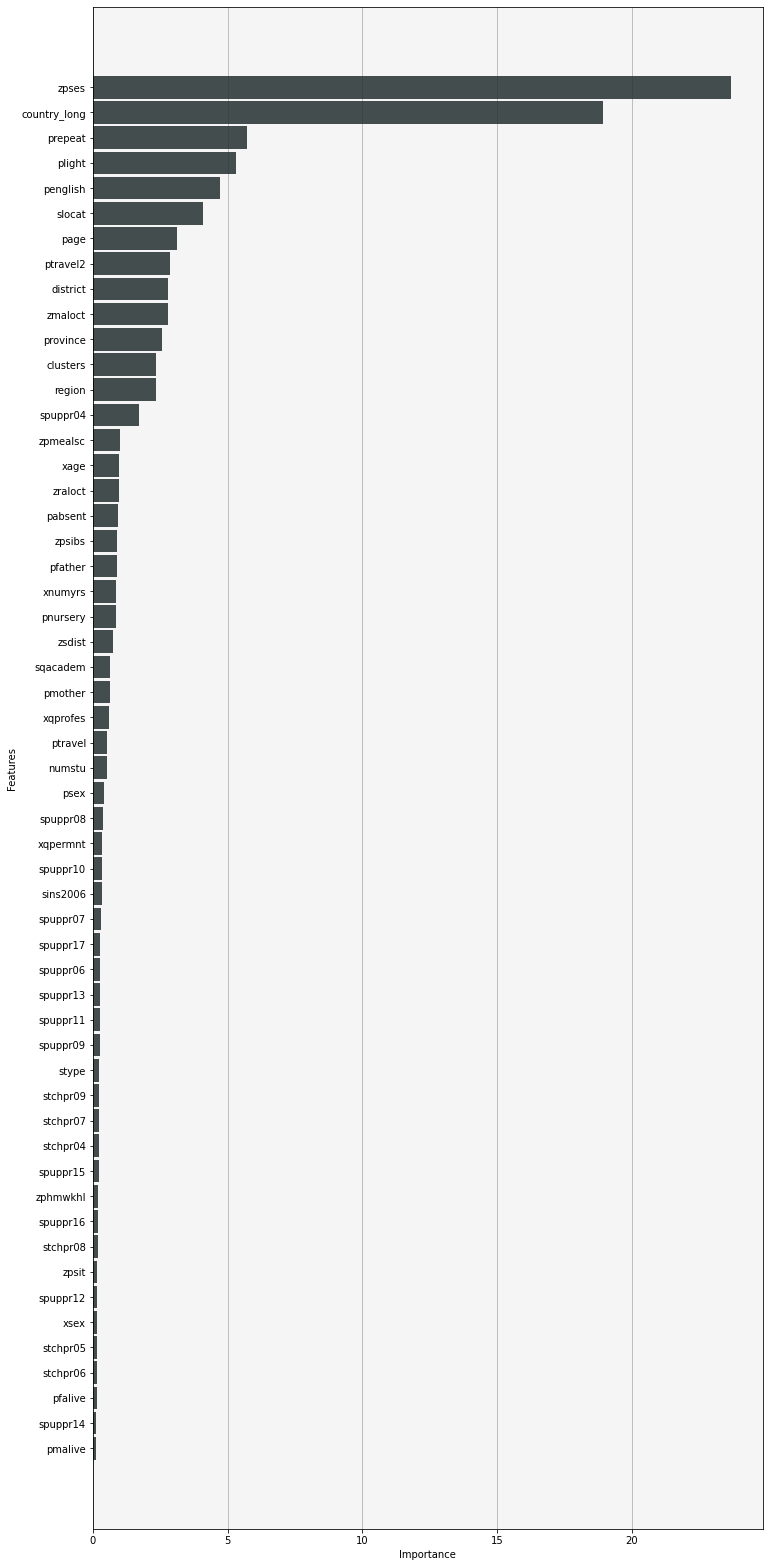

In [12]:
model.fit(input_relation = "africa_education_clusters", 
          X = predictors, 
          y = response)
predictors = model.features_importance().values["index"]

We can see the importance of the socio-economical statut and the country of the students. These factors can really influence the students work quality as having very bad studying conditions can lead to bad results (Examples: Country having an unstable government or Students having difficulties at home). For now, let's only consider the 20th most important variables. We can create a train and a test set using the 'split' variable created previously.

In [13]:
drop_view("africa_train")
africa.to_db(name = "africa_train",
             usecols = predictors[0:20] + ["zralocp", "zmalocp"],
             relation_type = "view",
             db_filter = "split < 0.7")
drop_view("africa_test")
africa.to_db(name = "africa_test",
             usecols = predictors[0:20] + ["zralocp", "zmalocp"],
             relation_type = "view",
             db_filter = "split >= 0.7")

The view africa_train was successfully dropped.
The view africa_test was successfully dropped.


,PABSENT,STCHPR05,SPUPPR14,zpmealsc,PREPEAT,zmaloct,SPUPPR06,SPUPPR10,zraloct,zralocp,district,XSEX,XQPROFES,PTRAVEL2,PTRAVEL,lat,PENGLISH,SPUPPR08,SPUPPR13,zpsit,STCHPR04,zpses,country_long,SPUPPR17,PMOTHER,STYPE,split,SPUPPR07,SPUPPR15,PMALIVE,zmalocp,STCHPR07,PLIGHT,REGION,lon,PFATHER,PSEX,XNUMYRS,SLOCAT,zsdist,province,numstu,PFALIVE,zphmwkhl,XQPERMNT,clusters,SPUPPR04,SPUPPR16,STCHPR09,PNURSERY,SINS2006,XAGE,SPUPPR11,SPUPPR09,SPUPPR12,STCHPR08,zpsibs,PAGE,STCHPR06,SQACADEM,schoolname
0,25,NEVER,NEVER,No,ONCE,803.02131290024,NEVER,SOMETIMES,777.327610028686,626.726377527847,KAGERA,FEMALE,1 YR TT,WALK,>2.5-3KM,-1.6762649,MOST OF THE TIME,SOMETIMES,NEVER,I have my own sitting place,NEVER,4.000,Tanzania,SOMETIMES,I Do Not Have a Mother,GOVERNMENT,0.89893188001588,SOMETIMES,NEVER,False,578.323382558671,NEVER,PARAFFIN/OIL,KAG,31.5686000,Completed All Primary,BOY,4.000,RURAL,15.00,KAGERA,25,YES,No homework/Never/Sometimes,PERMANENT GOVT,7,SOMETIMES,NEVER,NEVER,ONE YEAR,1.000,26.000,NEVER,SOMETIMES,NEVER,NEVER,4,16,NEVER,JUNIOR SEC,RULANDA
1,24,NEVER,NEVER,No,NEVER,865.243624106494,SOMETIMES,SOMETIMES,777.327610028686,443.792138175973,ARUSHA,FEMALE,1 YR TT,WALK,>2.5-3KM,-5.0214324,SOMETIMES,NEVER,NEVER,I have my own sitting place,NEVER,3.000,Tanzania,SOMETIMES,"No School, No Adult Education",GOVERNMENT,0.256625683512539,NEVER,NEVER,True,486.058834296235,SOMETIMES,FIRE,NOR,38.3681490,Completed All Primary,GIRL,4.000,RURAL,28.40,NORTHERN,24,YES,No homework/Never/Sometimes,PERMANENT GOVT,1,OFTEN,NEVER,NEVER,ONE YEAR,0.000,23.000,NEVER,SOMETIMES,NEVER,NEVER,5,15,NEVER,JUNIOR SEC,BARAKA
2,22,NEVER,NEVER,One per day,ONCE,803.229740193183,SOMETIMES,SOMETIMES,742.006790052328,464.393700063358,Vacoas & West,FEMALE,1 YR TT,BUS/TRUCK/VAN,>1-1.5KM,-20.298403,SOMETIMES,SOMETIMES,NEVER,I have my own sitting place,NEVER,11.000,Mauritius,SOMETIMES,Some Training After Primary,GOVERNMENT,0.153818720486015,SOMETIMES,NEVER,True,509.350006845411,NEVER,ELECTRIC,4VA,57.4938350,Completed All Primary,BOY,32.000,LARGE CITY,1.00,4VA&W(G),23,YES,No homework/Never/Sometimes,PERMANENT GOVT,4,NEVER,NEVER,NEVER,THREE OR MORE YEARS,0.000,58.000,SOMETIMES,SOMETIMES,NEVER,NEVER,2,12,NEVER,A-LEVEL,E. ROCHECOUSTE GS
3,18,NEVER,NEVER,No,NEVER,865.243624106494,SOMETIMES,SOMETIMES,777.327610028686,535.35463545324,ARUSHA,FEMALE,1 YR TT,WALK,>0.5-1KM,-5.0214324,SOMETIMES,NEVER,NEVER,I have my own sitting place,NEVER,4.000,Tanzania,SOMETIMES,Completed All Secondary,GOVERNMENT,0.242316509597003,NEVER,NEVER,True,513.288127807832,SOMETIMES,FIRE,NOR,38.3681490,Some Training After Primary,BOY,4.000,RURAL,28.40,NORTHERN,24,YES,No homework/Never/Sometimes,PERMANENT GOVT,1,OFTEN,NEVER,NEVER,NEVER,0.000,23.000,NEVER,SOMETIMES,NEVER,NEVER,7,15,NEVER,JUNIOR SEC,BARAKA
4,17,NEVER,NEVER,One per day,NEVER,803.229740193183,OFTEN,SOMETIMES,742.006790052328,408.883936089015,Port Louis & North,FEMALE,1 YR TT,WALK,>1-1.5KM,-20.16304,NEVER,NEVER,NEVER,I have my own sitting place,NEVER,9.000,Mauritius,OFTEN,Completed All Primary,GOVERNMENT,0.0179573260247707,SOMETIMES,NEVER,True,423.836523089981,SOMETIMES,ELECTRIC,1PL,57.5035710,I Do Not Have a Father,BOY,28.000,LARGE CITY,1.00,1PL&N(G),19,NO,No homework/Never/Sometimes,PERMANENT GOVT,4,NEVER,NEVER,NEVER,TWO YEARS,0.000,49.000,SOMETIMES,NEVER,NEVER,NEVER,1,11,NEVER,A-LEVEL,SURTEE SOONNEE GS
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: africa_education_clusters, Number of rows: 57168, Number of columns: 61

Let's do some parameters tuning to find the best parameters for the use case. We will use as metric to optimize the 'median_absolute_error'.

In [14]:
cursor = vertica_cursor("VerticaDSN")
best_score, configuration, i = 1000, [None], 0
for min_samples_leaf in [1, 3, 5]:
    for max_leaf_nodes in [5000, 10000, 1e9]:
        for max_depth in [15, 20, 25, 30]:
                model = RandomForestRegressor(name = "africa_rf",
                                              cursor = cursor,
                                              n_estimators = 20,
                                              max_depth = max_depth,
                                              max_leaf_nodes = max_leaf_nodes,
                                              min_samples_leaf = min_samples_leaf,
                                              nbins = 30,
                                              sample = 0.7)
                model.drop()
                model.fit(input_relation = "africa_train", 
                          X = predictors[0:20], 
                          y = response,
                          test_relation = "africa_test")
                test_score = model.score(method = "median_absolute_error")
                if test_score < best_score:
                    best_score, configuration = test_score, [min_samples_leaf, max_leaf_nodes, max_depth]
                i += 1
                if (i % 10 == 0):
                    print("The current best score is {}\nThe current best configuration is {}".format(best_score, configuration))
print("The best score is {}\nThe best configuration is {}".format(best_score, configuration))

The current best score is 44.4244347564463
The current best configuration is [1, 10000, 20]
The current best score is 44.1845292763922
The current best configuration is [1, 1000000000.0, 30]
The current best score is 44.1845292763922
The current best configuration is [1, 1000000000.0, 30]
The best score is 44.1845292763922
The best configuration is [1, 1000000000.0, 30]


As our model is excellent, we can create one for zralocp.

In [15]:
response = "zralocp"
model_africa_rf_zralocp = RandomForestRegressor(name = "africa_rf_zralocp",
                                                cursor = cursor,
                                                n_estimators = 40,
                                                max_depth = configuration[2],
                                                max_leaf_nodes = configuration[1],
                                                min_samples_leaf = configuration[0],
                                                nbins = 30,
                                                sample = 0.7)
model_africa_rf_zralocp.drop()
model_africa_rf_zralocp.fit("africa_education_clusters",
                            predictors[0:20], 
                            response)
model_africa_rf_zralocp.regression_report()

,value
explained_variance,0.915310699092638
max_error,394.803781462478
median_absolute_error,18.4160040601323
mean_absolute_error,22.8344103400208
mean_squared_error,874.281572189769
r2,0.915309515231455


<object>

And one for zmalocp.

In [16]:
response = "zmalocp"
model_africa_rf_zmalocp = RandomForestRegressor(name = "africa_rf_zmalocp",
                                                cursor = cursor,
                                                n_estimators = 40,
                                                max_depth = configuration[2],
                                                max_leaf_nodes = configuration[1],
                                                min_samples_leaf = configuration[0],
                                                nbins = 30,
                                                sample = 0.7)
model_africa_rf_zmalocp.drop()
model_africa_rf_zmalocp.fit("africa_education_clusters",
                            predictors[0:20], 
                            response)
model_africa_rf_zmalocp.regression_report()

,value
explained_variance,0.897752453929742
max_error,251.492571435651
median_absolute_error,19.0319871640143
mean_absolute_error,23.6626175586538
mean_squared_error,944.077896855894
r2,0.89775013616005


<object>

Let's look at the features importance of the different variables.

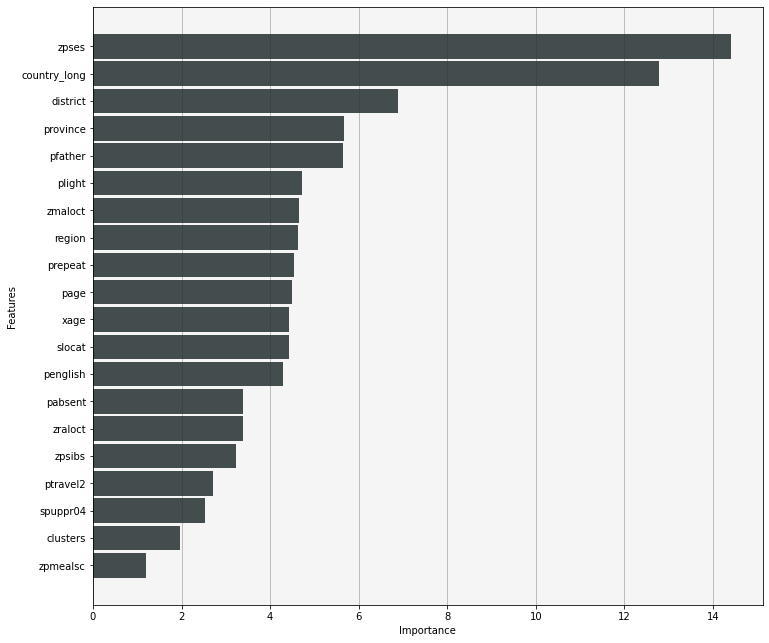

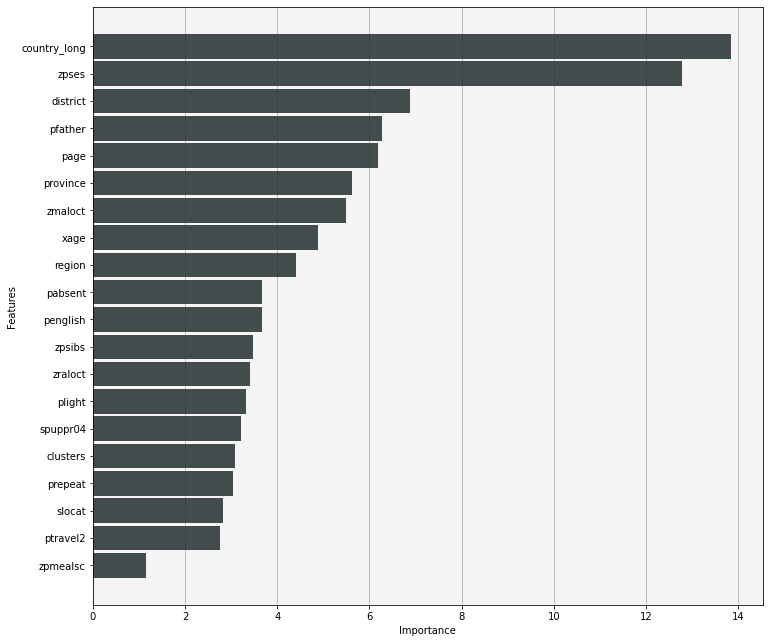

In [17]:
x = model_africa_rf_zralocp.features_importance()
x = model_africa_rf_zmalocp.features_importance()

The predictors importance is almost the same for the math score and the reading score.

We can add the predictions to the main vDataFrame.

In [18]:
africa = vDataFrame("africa_education_clusters")
africa = africa.select(predictors[0:20] + ["zralocp", "zmalocp"])
model_africa_rf_zralocp.predict(africa, name = "pred_zralocp")
model_africa_rf_zmalocp.predict(africa, name = "pred_zmalocp")
drop_table("africa_final")
africa.to_db(name = "africa_final",
             relation_type = "table",
             inplace = True)

The table africa_final was successfully dropped.


,PENGLISH,pred_zmalocp,zpmealsc,clusters,country_long,PAGE,XAGE,zmaloct,zraloct,zralocp,district,PTRAVEL2,PLIGHT,REGION,PFATHER,SLOCAT,zmalocp,SPUPPR04,zpses,pred_zralocp,PABSENT,zpsibs,PREPEAT,province
0,MOST OF THE TIME,583.731266523139,No,7,Tanzania,16,26.000,803.02131290024,777.327610028686,626.726377527847,KAGERA,WALK,PARAFFIN/OIL,KAG,Completed All Primary,RURAL,578.323382558671,SOMETIMES,4.000,630.586785941699,25,4,ONCE,KAGERA
1,SOMETIMES,506.306987960074,No,1,Tanzania,15,23.000,865.243624106494,777.327610028686,443.792138175973,ARUSHA,WALK,FIRE,NOR,Completed All Primary,RURAL,486.058834296235,OFTEN,3.000,482.532135396384,24,5,NEVER,NORTHERN
2,SOMETIMES,516.589585881329,One per day,4,Mauritius,12,58.000,803.229740193183,742.006790052328,464.393700063358,Vacoas & West,BUS/TRUCK/VAN,ELECTRIC,4VA,Completed All Primary,LARGE CITY,509.350006845411,NEVER,11.000,498.403365664449,22,2,ONCE,4VA&W(G)
3,SOMETIMES,517.915419938676,No,1,Tanzania,15,23.000,865.243624106494,777.327610028686,535.35463545324,ARUSHA,WALK,FIRE,NOR,Some Training After Primary,RURAL,513.288127807832,OFTEN,4.000,523.694723690588,18,7,NEVER,NORTHERN
4,NEVER,428.697289535027,One per day,4,Mauritius,11,49.000,803.229740193183,742.006790052328,408.883936089015,Port Louis & North,WALK,ELECTRIC,1PL,I Do Not Have a Father,LARGE CITY,423.836523089981,NEVER,9.000,399.710041505042,17,1,NEVER,1PL&N(G)
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: africa_final, Number of rows: 57168, Number of columns: 24

Let's compute some statistics to understand what makes a student good, intermediate or bad. First, let's compute a bubble plot using the two scores. 

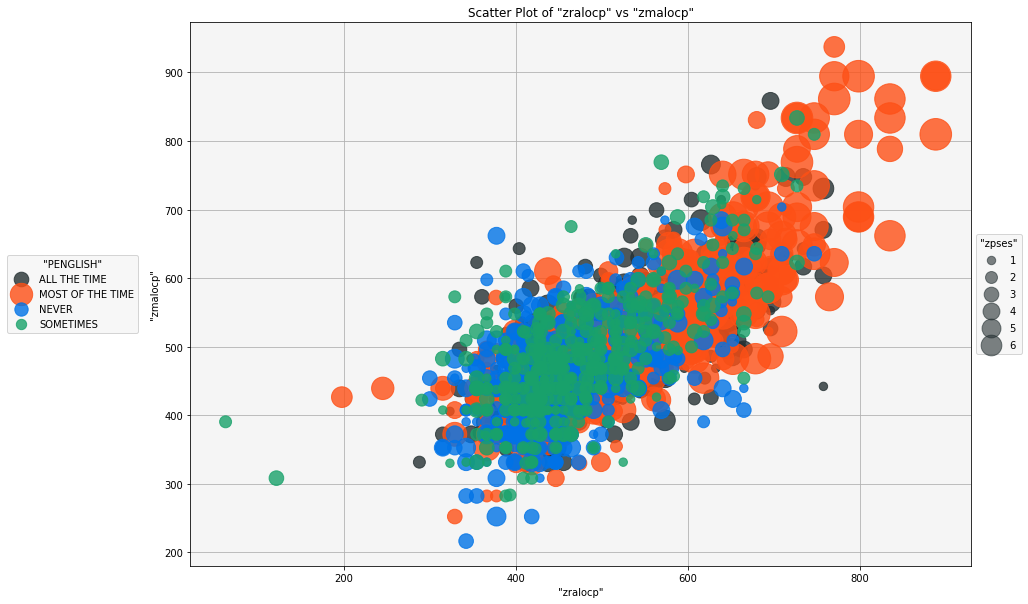

In [19]:
x = africa.bubble(columns = ["zralocp", "zmalocp"],
                  size_bubble_col = "zpses",
                  catcol = "PENGLISH",
                  max_nb_points = 2000)

We can see a clear influence of the home language and the socio-economic status. The bilingual students (speaking all the time english at home) are not the best ones. It is enough for a student to speak often english to be brillant. Besides the socio-economic status influences a lot the students scores. Students speaking often english at home and having a comfortable standard of living are the best ones. Let's now look at the influence of the Country.

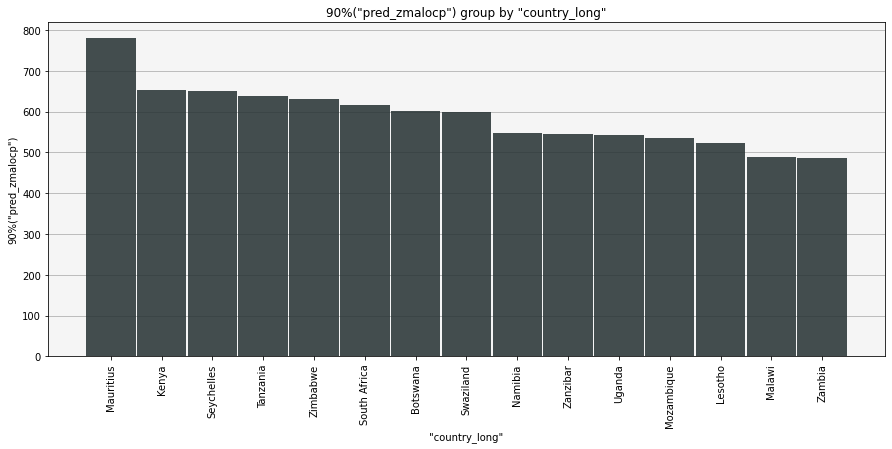

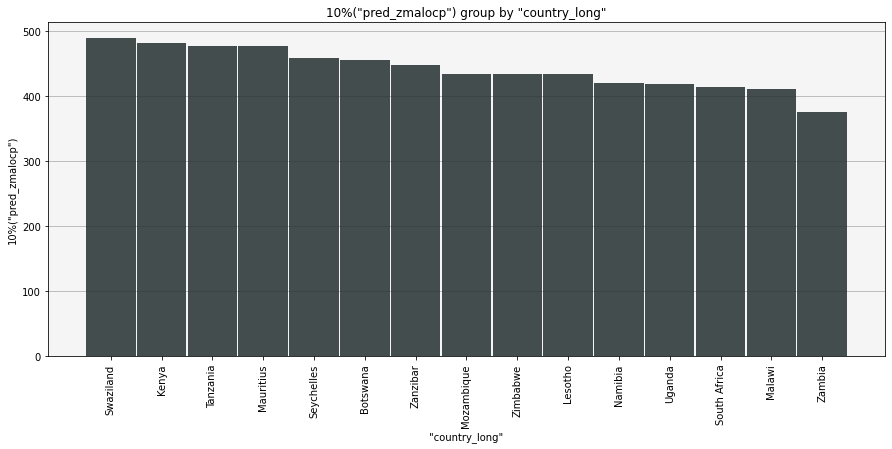

In [20]:
x = africa["country_long"].hist(method = "90%", 
                                of = "pred_zmalocp",
                                max_cardinality = 50)
x = africa["country_long"].hist(method = "10%", 
                                of = "pred_zmalocp",
                                max_cardinality = 50)

The country really influences the score. For example, Swaziland, Kenya and Tanzanie are probably over-rating the bad students (90% of the scores are greater than the average (500)) whereas some countries like Zambia, South Africa and Malawi are under-rating their students (90% of the scores are under 480). It could be related to the global education in the country. Some education systems could be harder than the others. Let's now look at the different regions.

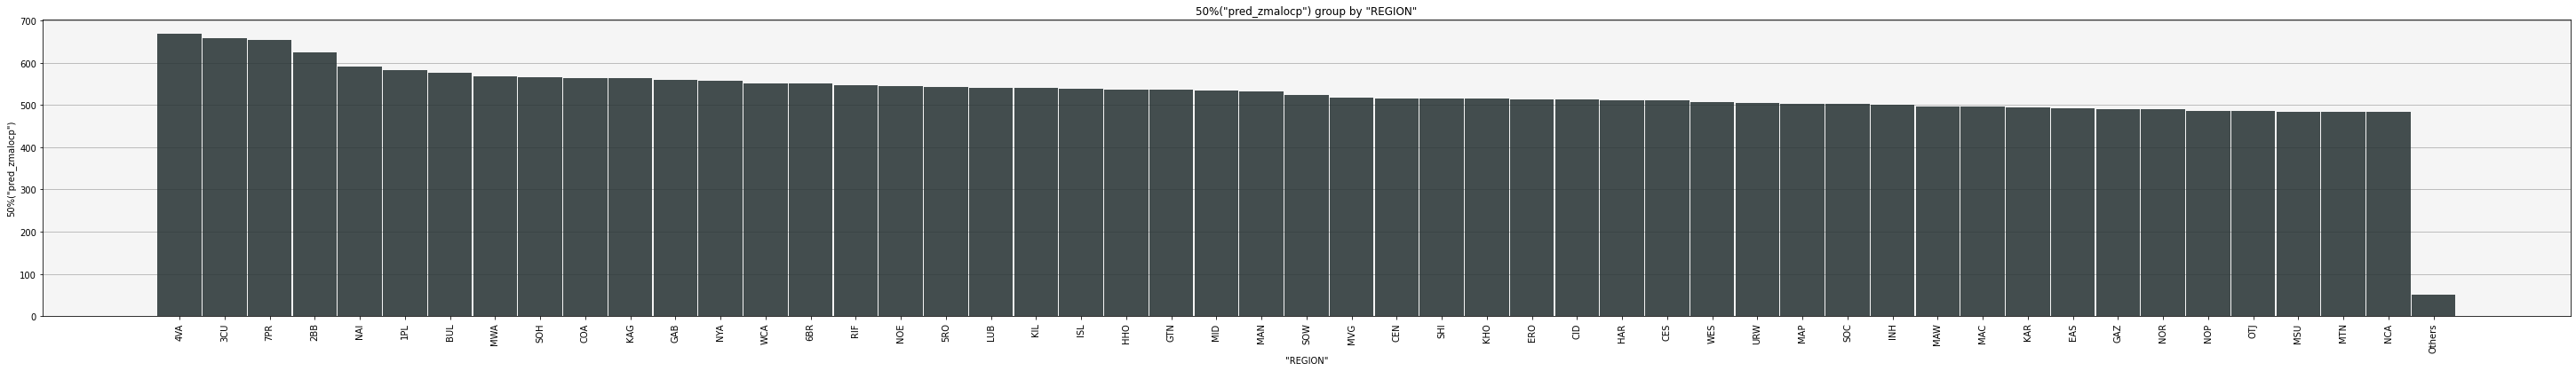

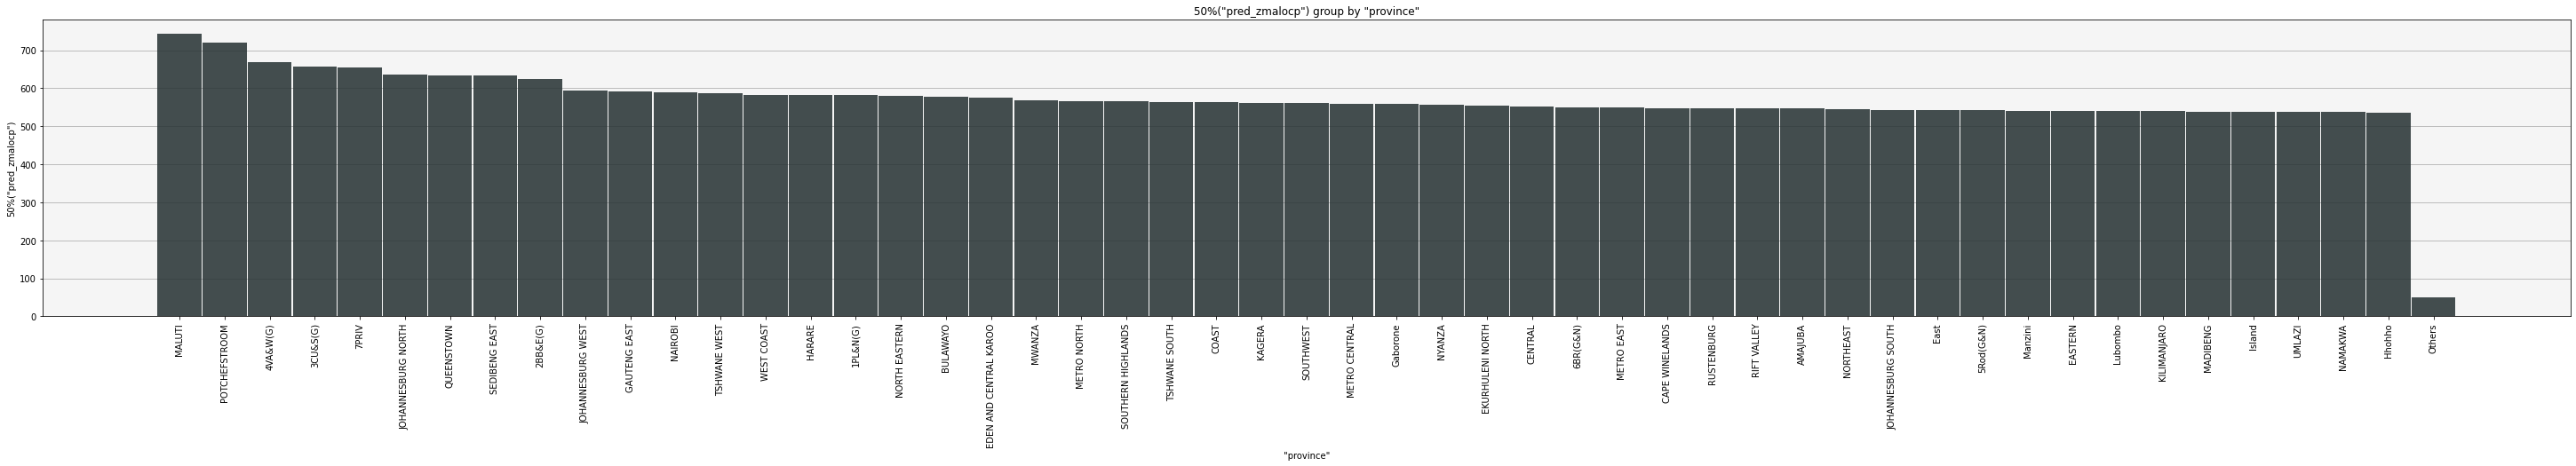

In [21]:
x = africa["REGION"].hist(method = "50%", 
                          of = "pred_zmalocp",
                          max_cardinality = 50)
x = africa["province"].hist(method = "50%", 
                            of = "pred_zmalocp",
                            max_cardinality = 50)

The same applies to the regions. Let's now look at the student age. 

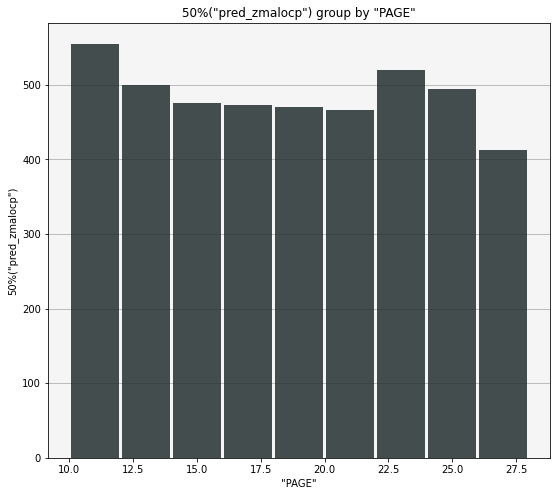

In [22]:
x = africa["PAGE"].hist(method = "50%", 
                        of = "pred_zmalocp",
                        h = 2)

Young students are globally better than the others. It is mainly because the oldest have difficulties to succeed. It can be due to the country political situation (For example, a country at war can bring too much responsabilities to children). Let's now look at the variables 'PLIGHT' and 'PREPEAT'.

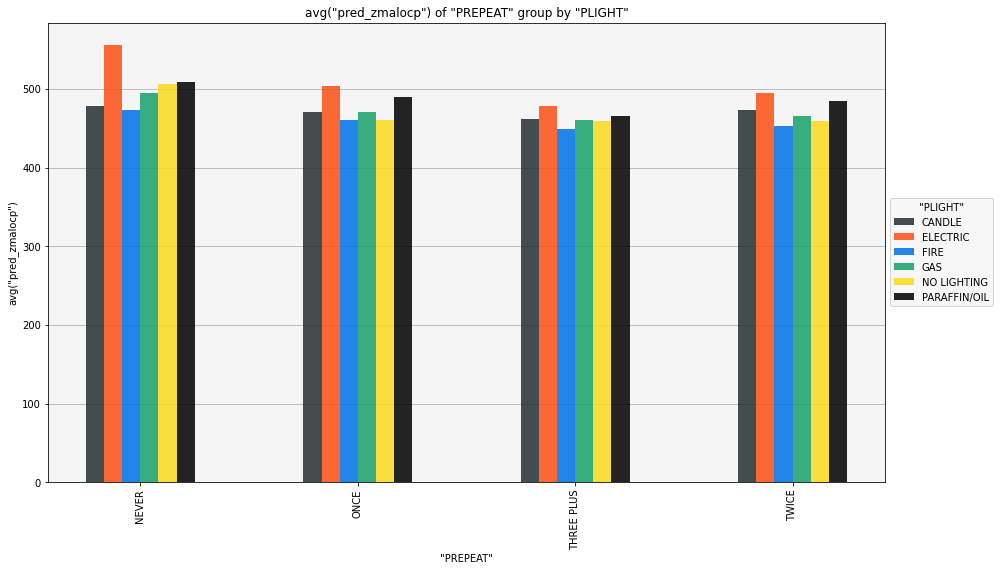

In [23]:
x = africa.hist(columns = ["PREPEAT", "PLIGHT"],
                method = "avg", 
                of = "pred_zmalocp")

We can see that people who never repeated the year and having light at home are in general better at school than the others. Let's now look on how students go to school.

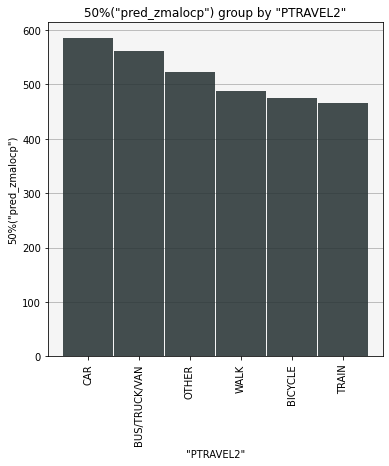

In [24]:
x = africa["ptravel2"].hist(method = "50%", 
                            of = "pred_zmalocp")

We can clearly see that students who have to do a lot of efforts to go to school have more difficulties than the others. Let's now look at the teacher level.

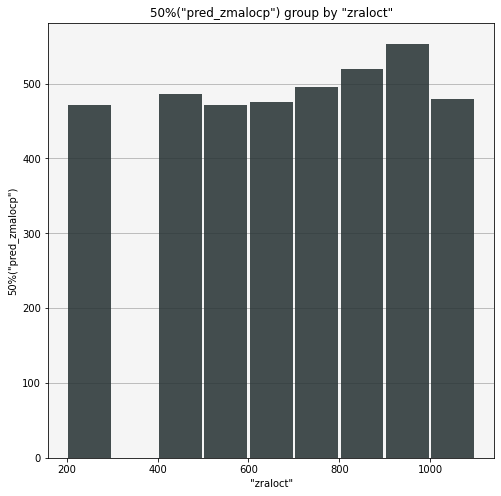

In [25]:
x = africa["zraloct"].hist(method = "50%",
                           of = "pred_zmalocp",
                           h = 100)

Good teachers lead generally to better results. Let's look at the influence of the 'district'.

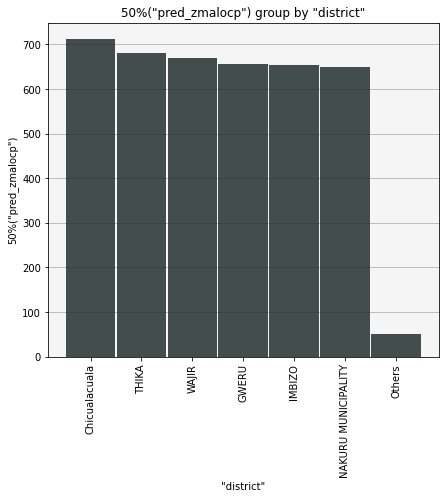

In [26]:
x = africa["district"].hist(method = "50%",
                           of = "pred_zmalocp",
                           h = 100)

Some districts can also lead to better results (example: Chicualacuala with a median score of 700)

To help students at school, some countries might have to change their expectations. Hard courses can bring down the motivation of some students as they are just children. Helping the students of poor families by creating extra school activities can help many students to do their best to succeed. Bringing light to more houses can also be an efficient method to help more students to succeed at school. Creating more public transports is also very important as students having difficult means of transports to go to school are more subject to bad global scores.

## Machine Learning: Finding the Best Pupils


To find the best pupils we can use the 'School' ID and compute the averaged score. We can then order by the averaged score desc and keep the top 5 students in each school.

In [27]:
from verticapy import *
africa = vDataFrame("africa_education_clean")
# Computing the averaged score
africa.eval(name = "score", 
            expr = "(zralocp + zmalocp) / 2")
# Computing the averaged student score
africa.analytic(func = "row_number",
                by = ["schoolname"],
                order_by = {"score": "desc"},
                name = "student_class_position")
# Finding the 3 best students by class
africa.case_when(name = "best",
                 conditions = {"student_class_position <= 5": 1},
                 others = 0)
# Selecting the main variables
africa = africa.select(["PENGLISH", 
                        "PAGE", 
                        "zmaloct", 
                        "zpses", 
                        "PREPEAT", 
                        "country_long",
                        "PTRAVEL2", 
                        "PLIGHT",
                        "REGION",
                        "SLOCAT",
                        "best",
                        "zpmealsc",
                        "PFATHER",
                        "SPUPPR04",
                        "PNURSERY",
                        "PABSENT"])
# Getting the categories dummies for the Logistic Regression
africa.get_dummies(columns = ["REGION", 
                              "PLIGHT", 
                              "PTRAVEL2", 
                              "country_long",
                              "PREPEAT",
                              "PENGLISH",
                              "SLOCAT",
                              "PFATHER",
                              "SPUPPR04",
                              "PNURSERY",
                              "PABSENT",
                              "zpmealsc"],
                   max_cardinality = 1000)
# Exporting the table
drop_table("best_students")
africa.to_db(name = "best_students",
             relation_type = "table")

The table best_students was successfully dropped.


,PENGLISH,PAGE,zmaloct,zpses,PREPEAT,country_long,PTRAVEL2,PLIGHT,REGION,SLOCAT,best,zpmealsc,PFATHER,SPUPPR04,PNURSERY,PABSENT,REGION_1PL,REGION_2BB,REGION_3CU,REGION_4VA,REGION_5RO,REGION_6BR,REGION_7PR,REGION_BER,REGION_BUL,REGION_BUT,REGION_CAB,REGION_CAP,REGION_CEA,REGION_CEN,REGION_CES,REGION_CID,REGION_COA,REGION_COP,REGION_CWE,REGION_EAS,REGION_ECA,REGION_ERO,REGION_FST,REGION_GAB,REGION_GAZ,REGION_GTN,REGION_HAR,REGION_HHO,REGION_INH,REGION_ISL,REGION_KAG,REGION_KAR,REGION_KAV,REGION_KHO,REGION_KIL,REGION_KUN,REGION_KZN,REGION_LER,REGION_LMP,REGION_LUA,REGION_LUB,REGION_LUS,REGION_MAC,REGION_MAE,REGION_MAN,REGION_MAP,REGION_MAW,REGION_MFT,REGION_MID,REGION_MKG,REGION_MNC,REGION_MOH,REGION_MPU,REGION_MSU,REGION_MTN,REGION_MTS,REGION_MVG,REGION_MWA,REGION_NAI,REGION_NAM,REGION_NCA,REGION_NEA,REGION_NEW,REGION_NIA,REGION_NOE,REGION_NOP,REGION_NOR,REGION_NOU,REGION_NWP,REGION_NYA,REGION_OHA,REGION_OMA,REGION_OMU,REGION_OSH,REGION_OTJ,REGION_QNK,REGION_QUT,REGION_RIF,REGION_SEA,REGION_SHI,REGION_SHN,REGION_SOC,REGION_SOF,REGION_SOH,REGION_SOP,REGION_SOU,REGION_SOW,REGION_SWE,REGION_TET,REGION_THA,REGION_URW,REGION_WCA,REGION_WES,PLIGHT_CANDLE,PLIGHT_ELECTRIC,PLIGHT_FIRE,PLIGHT_GAS,PLIGHT_NO_LIGHTING,PTRAVEL2_BICYCLE,PTRAVEL2_BUS_TRUCK_VAN,PTRAVEL2_CAR,PTRAVEL2_OTHER,PTRAVEL2_TRAIN,country_long_Botswana,country_long_Kenya,country_long_Lesotho,country_long_Malawi,country_long_Mauritius,country_long_Mozambique,country_long_Namibia,country_long_Seychelles,country_long_South_Africa,country_long_Swaziland,country_long_Tanzania,country_long_Uganda,country_long_Zambia,country_long_Zanzibar,PREPEAT_NEVER,PREPEAT_ONCE,PREPEAT_THREE_PLUS,PENGLISH_ALL_THE_TIME,PENGLISH_MOST_OF_THE_TIME,PENGLISH_NEVER,SLOCAT_ISOLATED,SLOCAT_LARGE_CITY,SLOCAT_RURAL,PFATHER_Completed_All_Primary,PFATHER_Completed_All_Secondary,PFATHER_Completed_Some_Primary,PFATHER_Completed_Some_Secondary,PFATHER_Completed_Some_University,PFATHER_Completed_Training_After_Secondary,PFATHER_Completed_University_Degree,PFATHER_I_Do_Not_Have_a_Father,PFATHER_I_Do_Not_Know,PFATHER_No_School__No_Adult_Education,PFATHER_No_School__Some_Adult_Education,SPUPPR04_NEVER,SPUPPR04_OFTEN,PNURSERY_A_FEW_MONTHS,PNURSERY_NEVER,PNURSERY_ONE_YEAR,PNURSERY_THREE_OR_MORE_YEARS,PABSENT_0,PABSENT_1,PABSENT_2,PABSENT_3,PABSENT_4,PABSENT_5,PABSENT_6,PABSENT_7,PABSENT_8,PABSENT_9,PABSENT_10,PABSENT_11,PABSENT_12,PABSENT_13,PABSENT_14,PABSENT_15,PABSENT_16,PABSENT_17,PABSENT_18,PABSENT_19,PABSENT_20,PABSENT_21,PABSENT_22,PABSENT_23,PABSENT_24,PABSENT_25,zpmealsc_No,zpmealsc_One_per_day
0,SOMETIMES,11,1008.36619165505,11.000,NEVER,South Africa,WALK,ELECTRIC,WCA,SMALLTOWN,1,One per day,Completed University Degree,OFTEN,THREE OR MORE YEARS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,NEVER,12,1008.36619165505,10.000,NEVER,South Africa,WALK,ELECTRIC,WCA,SMALLTOWN,1,One per day,Completed Some Secondary,OFTEN,THREE OR MORE YEARS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,SOMETIMES,13,1008.36619165505,7.000,NEVER,South Africa,WALK,ELECTRIC,WCA,SMALLTOWN,1,One per day,I Do Not Know,OFTEN,THREE OR MORE YEARS,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,

<object>  Name: africa_education_clean, Number of rows: 57168, Number of columns: 187

Let's create a Logistic Regression to understand what makes a student on the top 5 of his/her class.

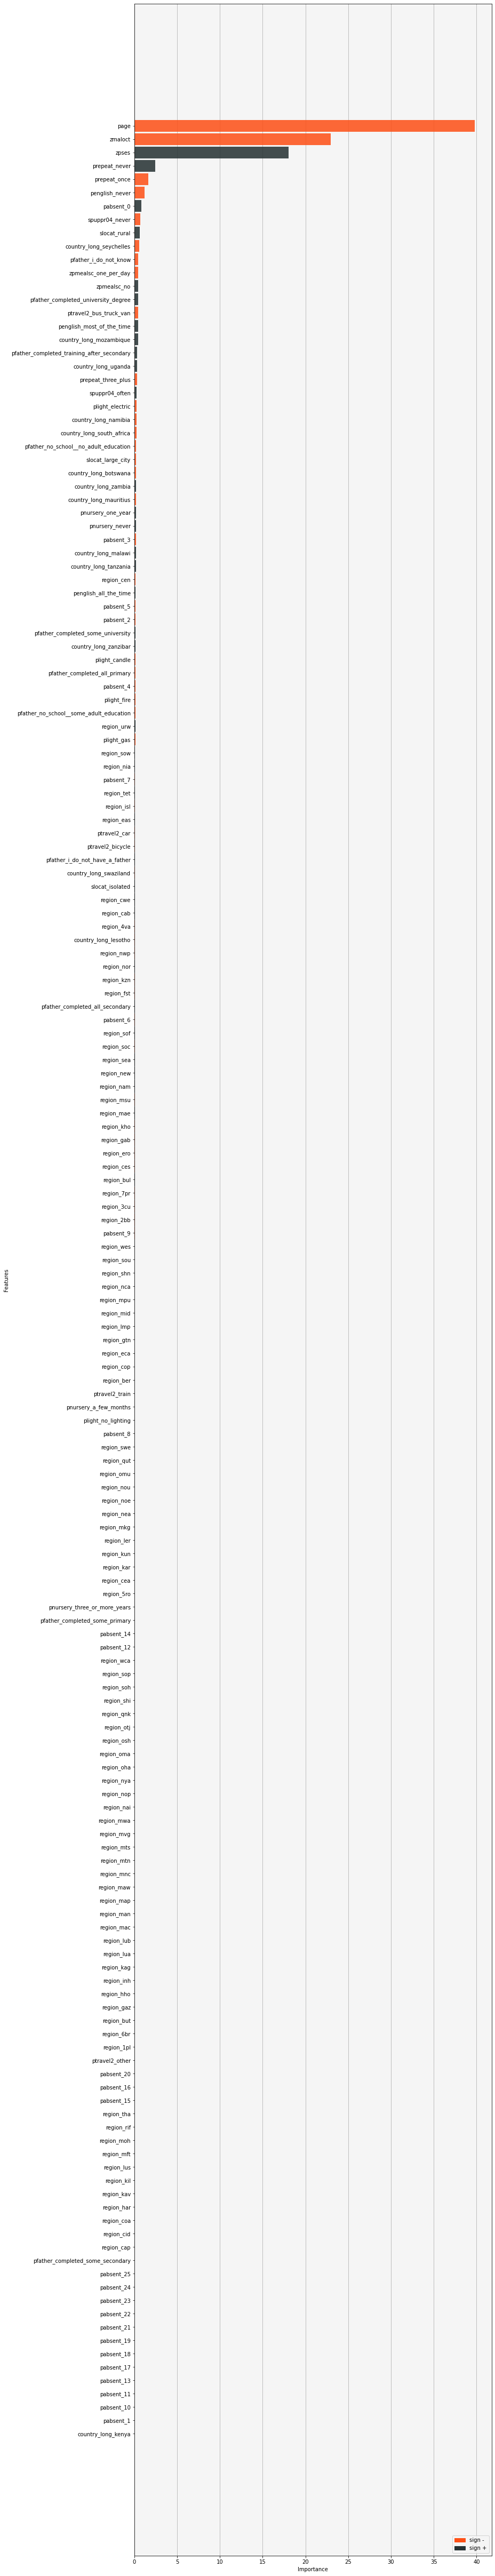

In [28]:
from verticapy.learn.linear_model import LogisticRegression
response = "best"
predictors = africa.get_columns(exclude_columns = ["REGION", 
                                                   "PLIGHT", 
                                                   "PTRAVEL2", 
                                                   "country_long",
                                                   "PREPEAT",
                                                   "PENGLISH",
                                                   "SLOCAT",
                                                   "PFATHER",
                                                   "SPUPPR04",
                                                   "PNURSERY",
                                                   "PABSENT",
                                                   "zpmealsc",
                                                   "clusters",
                                                   "best",
                                                   "split"])
model_africa_logit_best = LogisticRegression(name = "africa_logit_best")
model_africa_logit_best.drop()
model_africa_logit_best.fit("best_students",
                            predictors, 
                            response)
x = model_africa_logit_best.features_importance()

It is clear that best students have good socio-economic status and are the youngest. They never repeated classes and they can speak english. It seems also that teachers good in mathematics are not enough pedagogue.

## Conclusion

We have solved this use-case in a pandas-like way but we never loaded the data in memory. This example showed an overview of the library. You can now start your own project by looking at the documentation first.